In [262]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, MultiTaskLassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import os
os.chdir('C:\\Users\\enewm\\Documents\\MA 510\\data')

#Read Train Data 
df = pd.read_csv("cleaned_train.csv")
df = df.drop(columns = ['Unnamed: 0'])
#PCA dimension reduced files
X_train = pd.read_pickle("X_train_pca.npk")
X_test = pd.read_pickle("X_test_pca.npk")

#keeps the totalRansactionRevenue, class_pred = 0 if didnt buy anythin and 1 if did
y_test = pd.read_pickle("y_test.pkl")
y_train = pd.read_pickle("y_train.pkl")

c:\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [263]:
##Original dataset 
#Remove all rows where totals.transactionRevenue=0 for original data
df = df[df['totals.transactionRevenue'] != 0]

In [264]:
#Separate into predictors and response for original data
y_original =df['totals.transactionRevenue']
x_original=df.drop('totals.transactionRevenue',axis=1)

In [265]:
#Split original data into test and training
x_train_orig, x_test_orig , y_train_orig, y_test_orig = train_test_split(x_original, y_original, test_size=0.2, random_state=1)

In [267]:
#Fit Lasso Model
lasso_orig=LassoCV(cv=10)
lasso_orig.fit(x_train_orig,y_train_orig)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [229]:
#Calculate test MSE 
mse=mean_squared_error(y_test_orig, lasso_orig.predict(x_test_orig))
rmse=math.sqrt(mse)
rmse

591186304.9057618

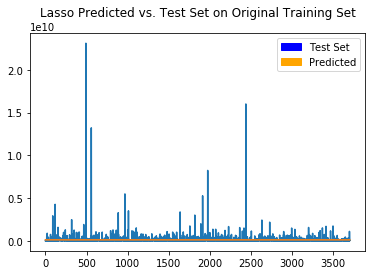

In [268]:
#Plot data
y_pred_orig=lasso_orig.predict(x_test_orig)
plt.plot(range(0,len(x_test_orig)),y_test_orig)
plt.plot(range(0,len(y_test_orig)),y_pred_orig) 
import pylab
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color='blue', label='Test Set')
orange_patch=mpatches.Patch(color='orange',label='Predicted')
plt.legend(handles=[blue_patch,orange_patch])
title=plt.title("Lasso Predicted vs. Test Set on Original Training Set")
title.set_position([.5, 1.05])

In [269]:
##PCA Data 
#Remove entries with 0 revenue for PCA Data training set 
X_train=X_train[y_train ['totals.transactionRevenue']!=0]
y_train = y_train[y_train['totals.transactionRevenue'] != 0]


In [274]:
#Remove entries with 0 revenue for PCA testing set 
X_test=X_test[y_test['totals.transactionRevenue']!=0]
y_test=y_test[y_test['totals.transactionRevenue']!=0]

In [271]:
#Remove any additional columns
y_train_rev=y_train['totals.transactionRevenue']
y_test_rev=y_test['totals.transactionRevenue']


In [272]:
#Split training set into testing and training set for PCA training set
#Divide PCA Testing set into Training and Test Set
x_train2, x_test2 , y_train2, y_test2= train_test_split(X_train,y_train_rev,test_size=0.2, random_state=7)

In [275]:
#Fit a lasso Model to PCA set 
lasso_PCA=LassoCV(cv=10)
lasso_PCA.fit(x_train2,y_train2)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [276]:
#Testing Error for PCA Dataset
mse=mean_squared_error(y_test2, lasso_PCA.predict(x_test2))
rmse=math.sqrt(mse)
rmse


270423084.063669

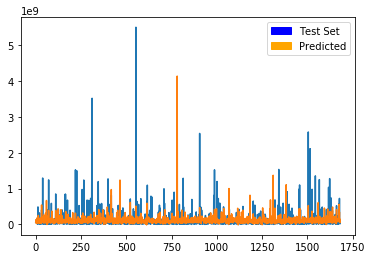

In [277]:
#Plot PCA Lasso 
y_pred_PCA=lasso_PCA.predict(x_test2)
plt.plot(range(0,len(x_test2)),y_test2)
plt.plot(range(0,len(y_test2)),y_pred_PCA) 
blue_patch = mpatches.Patch(color='blue', label='Test Set')
orange_patch=mpatches.Patch(color='orange',label='Predicted')
plt.legend(handles=[blue_patch,orange_patch])


In [278]:
#Compute test MSE for Lasso
mse=mean_squared_error(y_test2, lasso_PCA.predict(x_test2))
rmse=math.sqrt(mse)
rmse

270423084.063669

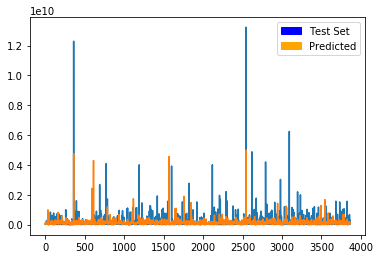

In [279]:
#Test on original unused test set (PCA)
mse=mean_squared_error(y_test_rev, lasso_PCA.predict(X_test))
rmse=math.sqrt(mse)
rmse

#Plot 
y_pred_PCA2=lasso_PCA.predict(X_test)
plt.plot(range(0,len(X_test)),y_test_rev)
plt.plot(range(0,len(y_test_rev)),y_pred_PCA2) 
blue_patch = mpatches.Patch(color='blue', label='Test Set')
orange_patch=mpatches.Patch(color='orange',label='Predicted')
plt.legend(handles=[blue_patch,orange_patch])

In [288]:
#Divide transformed data set into a test and training set (Original Data)
x_train_tran, x_test_tran, y_train_tran, y_test_tran= train_test_split(x_original,np.log(y_original),test_size=0.2, random_state=9)

In [289]:
#Fit a model on log data
lasso_log_orig=LassoCV(cv=10)
lasso_log_orig.fit(x_train_tran,y_train_tran)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [291]:
#Compute test MSE for Lasso
mse_tran=mean_squared_error(y_test_tran, lasso_log_orig.predict(x_test_tran))
rmse_tran=math.sqrt(mse_tran)
rmse_tran

1.2172663054594663

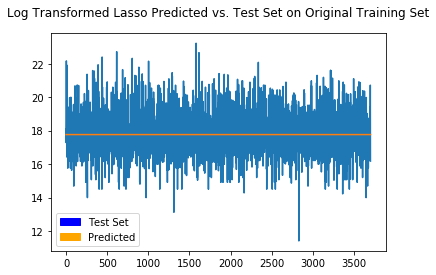

In [294]:
#Plot data
y_pred_tran=lasso_log_orig.predict(x_test_tran)
plt.plot(range(0,len(x_test_tran)),y_test_tran)
plt.plot(range(0,len(y_test_tran)),y_pred_tran) 

blue_patch = mpatches.Patch(color='blue', label='Test Set')
orange_patch=mpatches.Patch(color='orange',label='Predicted')
plt.legend(handles=[blue_patch,orange_patch])
title=plt.title("Log Transformed Lasso Predicted vs. Test Set on Original Training Set")
title.set_position([.5, 1.05])

In [256]:
#Fit transformed data to the PCA data Log*)
#PCA dimension reduced files

X_train=X_train[y_train ['totals.transactionRevenue']!=0]
y_train = y_train[y_train['totals.transactionRevenue'] != 0]
#Remove entries with 0 revenue for PCA
X_test=X_test[y_test['totals.transactionRevenue']!=0]
y_test=y_test[y_test['totals.transactionRevenue']!=0]
#Remove any additional columns
y_train_rev=y_train['totals.transactionRevenue']
y_test_rev=y_test['totals.transactionRevenue']

#Take log of response data sets
y_train_log=np.log(y_train_rev)
y_test_rev_log=np.log(y_test_rev)



In [216]:
#Divide transformed data set into a test and training set
x_train_pca_tran, x_test_pca_tran, y_train_pca_tran, y_test_pca_tran= train_test_split(X_train,y_train_log,test_size=0.2, random_state=8)

In [217]:
#Fit the PCA transformed data
lasso_pca_trans=LassoCV(cv=10)
lasso_pca_trans.fit(x_train_pca_tran,y_train_pca_tran)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [218]:
#Compute MSE and RMSE
pred_log=lasso_pca_trans.predict(x_test_pca_tran)
mse_pca_tran=mean_squared_error(y_test_pca_tran, lasso_pca_trans.predict(x_test_pca_tran))
rmse_tran=math.sqrt(mse_pca_tran)
rmse_tran


1.1381637613730868

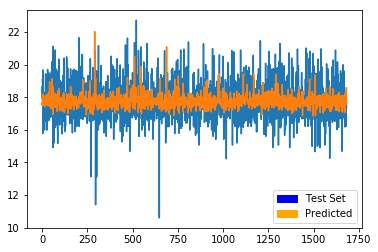

In [220]:
#Plot PCA Transform data
y_pred_PCA_trans=lasso_pca_trans.predict(x_test_pca_tran)
plt.plot(range(0,len(x_test_pca_tran)),y_test_pca_tran)
plt.plot(range(0,len(y_test_pca_tran)),y_pred_PCA_trans) 
blue_patch = mpatches.Patch(color='blue', label='Test Set')
orange_patch=mpatches.Patch(color='orange',label='Predicted')
plt.legend(handles=[blue_patch,orange_patch])

In [224]:
#Test on unused PCA testing set
mse_pca_tran2=mean_squared_error(y_test_rev_log,lasso_pca_trans.predict(X_test))
lasso_pca_predict=lasso_pca_trans.predict(X_test)
rmse_pca_tran2=math.sqrt(mse_pca_tran2)
rmse_tran


1.1381637613730868

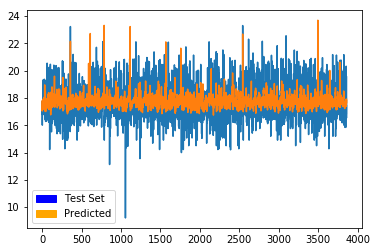

In [225]:
#Plot unused testing set for PCA 
lasso_pca_predict_log2=lasso_pca_trans.predict(X_test)
plt.plot(range(0,len(X_test)),y_test_rev_log)
plt.plot(range(0,len(y_test_rev_log)),lasso_pca_predict) ###Store each prediction as a prediction variable
blue_patch = mpatches.Patch(color='blue', label='Test Set')
orange_patch=mpatches.Patch(color='orange',label='Predicted')
plt.legend(handles=[blue_patch,orange_patch])